                   Sector  Percentage_Gain
0  Consumer Discretionary       369.352018
4              Technology       368.827680
3              Healthcare       267.557290
1        Consumer Staples       226.641232
2              Financials       169.090328


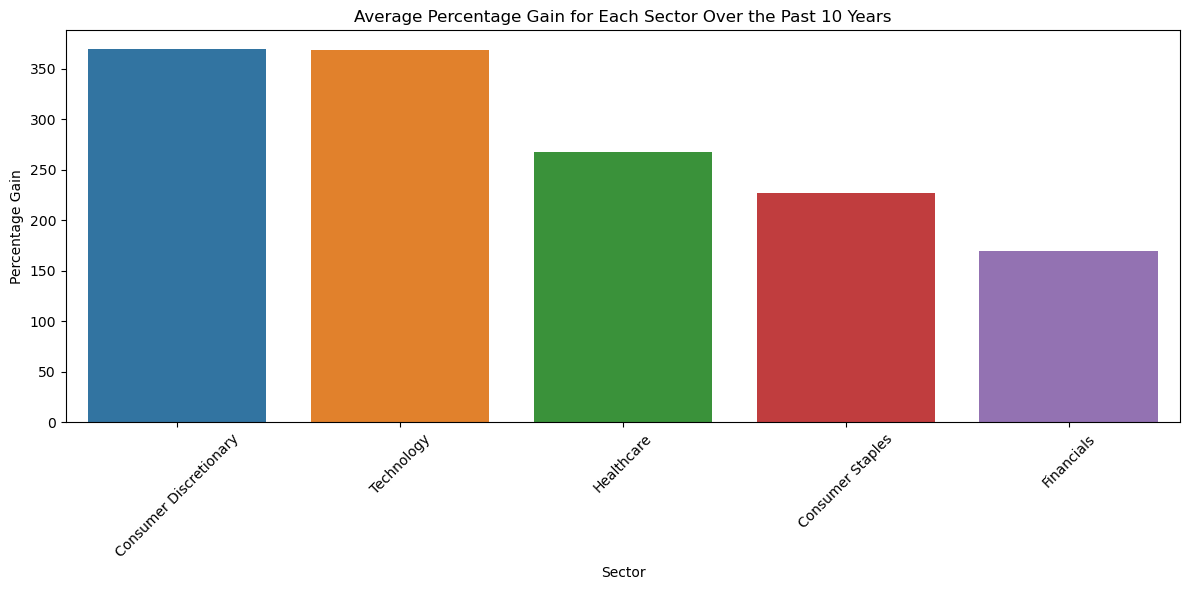

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('C:/Users/Home/Downloads/Lambton/MHS/2nd Term/AI/Group Project/Dataset/final.csv')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter for the last 10 years
last_10_years = data[data['Date'] >= (data['Date'].max() - pd.DateOffset(years=10))]

# Exclude the "Index" and "Telecommunication Services" sectors
last_10_years = last_10_years[(last_10_years['Sector'] != 'Index') & (last_10_years['Sector'] != 'Telecommunication Services')]

# Calculate the starting and ending average closing prices for each sector
start_prices = last_10_years.groupby('Sector').apply(lambda x: x[x['Date'] == x['Date'].min()]['Close'].mean()).reset_index()
end_prices = last_10_years.groupby('Sector').apply(lambda x: x[x['Date'] == x['Date'].max()]['Close'].mean()).reset_index()

# Rename the columns
start_prices.columns = ['Sector', 'Close_start']
end_prices.columns = ['Sector', 'Close_end']

# Calculate the percentage gain for each sector
start_end_prices = pd.merge(start_prices, end_prices, on='Sector')
start_end_prices['Percentage_Gain'] = ((start_end_prices['Close_end'] - start_end_prices['Close_start']) / start_end_prices['Close_start']) * 100

# Sort by Percentage_Gain in descending order
start_end_prices = start_end_prices.sort_values(by='Percentage_Gain', ascending=False)

# Display the percentage gain for each sector
print(start_end_prices[['Sector', 'Percentage_Gain']])

# Plot the percentage gain for each sector
plt.figure(figsize=(12, 6))
sns.barplot(data=start_end_prices, x='Sector', y='Percentage_Gain', palette='tab10')
plt.title('Average Percentage Gain for Each Sector Over the Past 10 Years')
plt.xlabel('Sector')
plt.ylabel('Percentage Gain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                   Sector  Annual_Return
0  Consumer Discretionary      16.721234
4              Technology      16.708188
3              Healthcare      13.902303
1        Consumer Staples      12.565965
2              Financials      10.405271


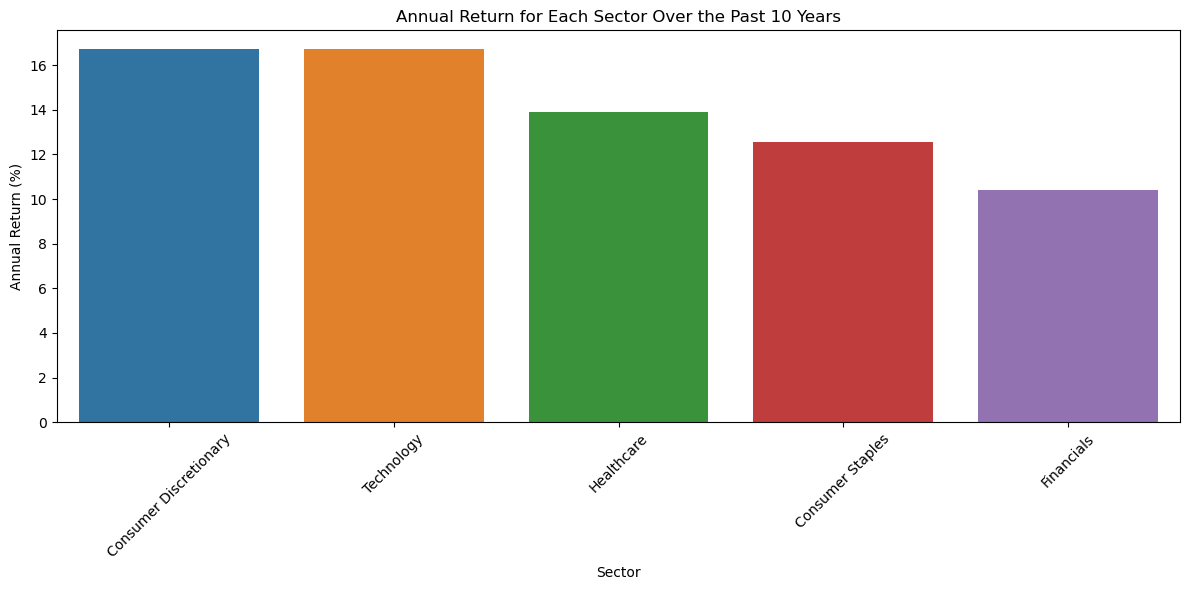

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('C:/Users/Home/Downloads/Lambton/MHS/2nd Term/AI/Group Project/Dataset/final.csv')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter for the last 10 years
last_10_years = data[data['Date'] >= (data['Date'].max() - pd.DateOffset(years=10))]

# Exclude the "Index" and "Telecommunication Services" sectors
last_10_years = last_10_years[(last_10_years['Sector'] != 'Index') & (last_10_years['Sector'] != 'Telecommunication Services')]

# Calculate the starting and ending average closing prices for each sector
start_prices = last_10_years.groupby('Sector').apply(lambda x: x[x['Date'] == x['Date'].min()]['Close'].mean()).reset_index()
end_prices = last_10_years.groupby('Sector').apply(lambda x: x[x['Date'] == x['Date'].max()]['Close'].mean()).reset_index()

# Rename the columns
start_prices.columns = ['Sector', 'Close_start']
end_prices.columns = ['Sector', 'Close_end']

# Merge start and end prices
start_end_prices = pd.merge(start_prices, end_prices, on='Sector')

# Calculate the number of years in the period
num_years = 10

# Calculate the CAGR for each sector
start_end_prices['Annual_Return'] = ((start_end_prices['Close_end'] / start_end_prices['Close_start']) ** (1 / num_years) - 1) * 100

# Sort by Annual Return in descending order
start_end_prices = start_end_prices.sort_values(by='Annual_Return', ascending=False)

# Display the annual return for each sector
print(start_end_prices[['Sector', 'Annual_Return']])

# Plot the annual return for each sector
plt.figure(figsize=(12, 6))
sns.barplot(data=start_end_prices, x='Sector', y='Annual_Return', palette='tab10')
plt.title('Annual Return for Each Sector Over the Past 10 Years')
plt.xlabel('Sector')
plt.ylabel('Annual Return (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


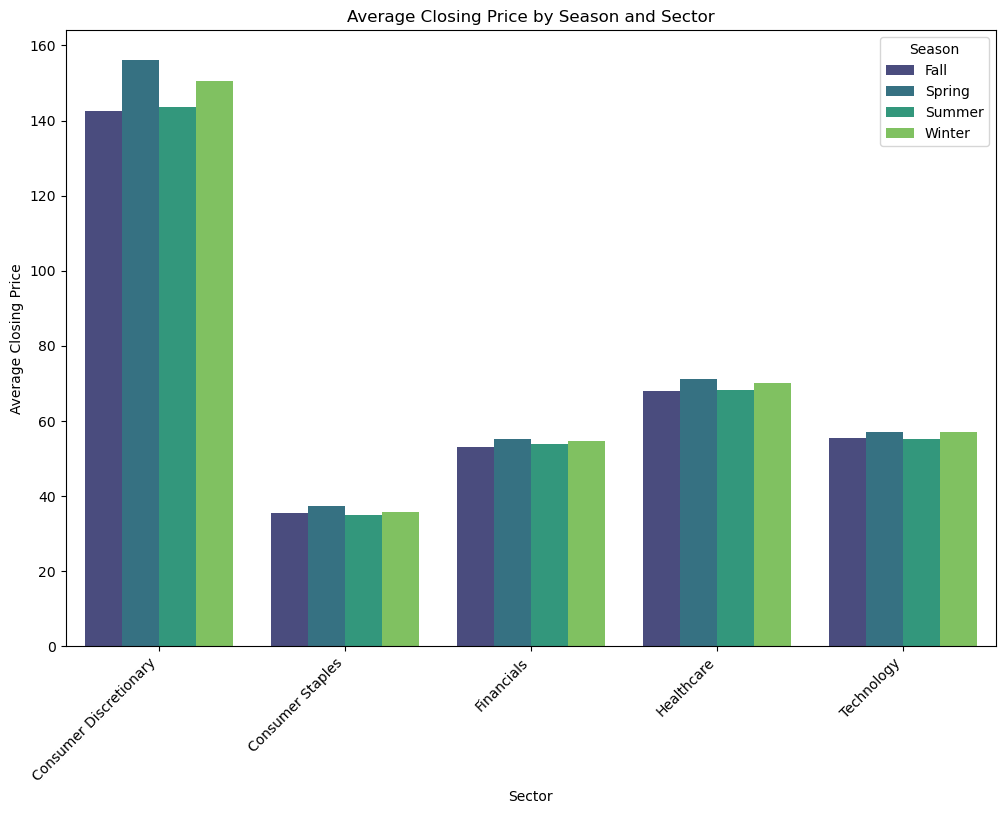

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('C:/Users/Home/Downloads/Lambton/MHS/2nd Term/AI/Group Project/Dataset/final.csv')

# Create a pivot table for the bar chart
pivot_table = df.pivot_table(values='Close', index='Season', columns='Sector', aggfunc='mean')

# Remove "Index" and "Telecommunication Services"
pivot_table = pivot_table.drop(columns=['Index', 'Telecommunication Services'])

# Transform the pivot table for plotting
pivot_table = pivot_table.reset_index().melt(id_vars='Season', var_name='Sector', value_name='Average Close')

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Sector', y='Average Close', hue='Season', data=pivot_table, palette='viridis')
plt.title('Average Closing Price by Season and Sector')
plt.xlabel('Sector')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season')
plt.show()
